In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error



plt.style.use('ggplot')

In [224]:
df =  pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [225]:
df.shape

(20640, 10)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [227]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [228]:
print(df['median_house_value'].min())
print(df['median_house_value'].max())

14999.0
500001.0


In [229]:
df[df['median_house_value']>=500000].shape

(992, 10)

In [230]:
df['median_house_value'].value_counts(bins=10)

(111999.4, 160499.6]    4099
(160499.6, 208999.8]    3771
(63499.2, 111999.4]     3612
(208999.8, 257500.0]    2804
(257500.0, 306000.2]    1764
(451500.8, 500001.0]    1243
(306000.2, 354500.4]    1239
(14513.997, 63499.2]     877
(354500.4, 403000.6]     752
(403000.6, 451500.8]     479
Name: median_house_value, dtype: int64

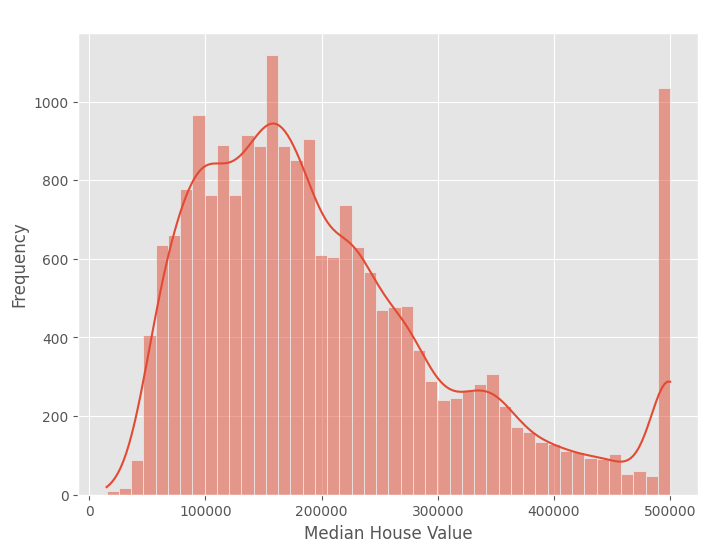

In [231]:
plt.figure(figsize=(8, 6))
sns.histplot(df['median_house_value'], kde=True)  # Use histplot for a combined histogram and KDE
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

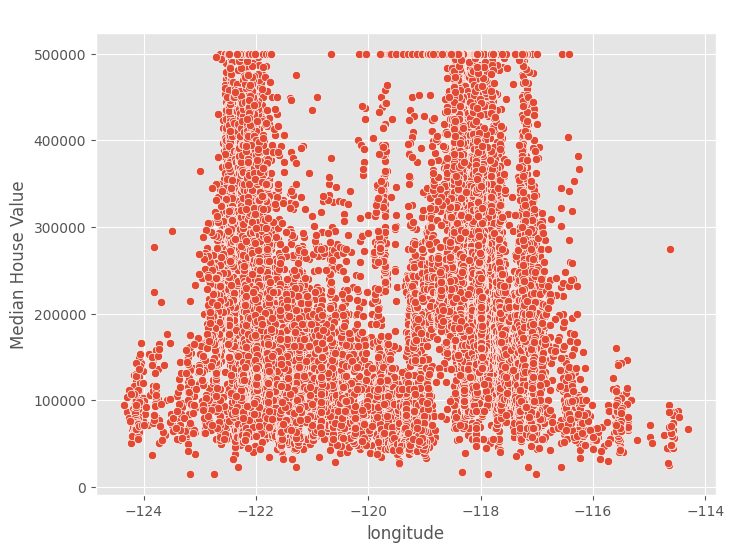

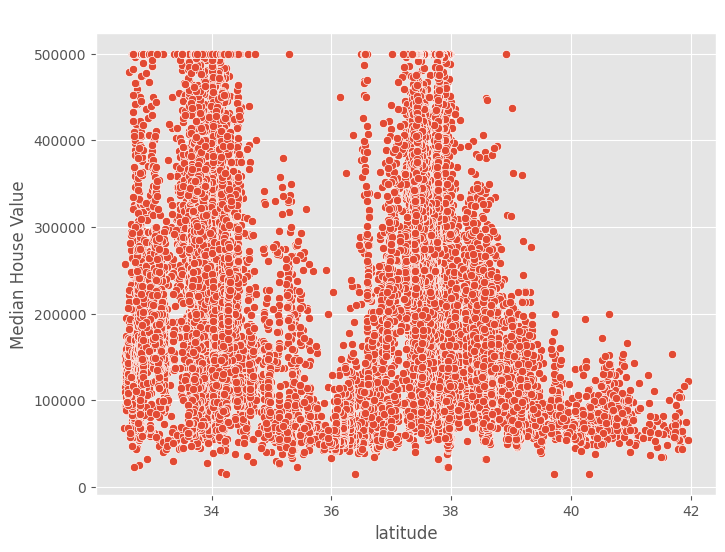

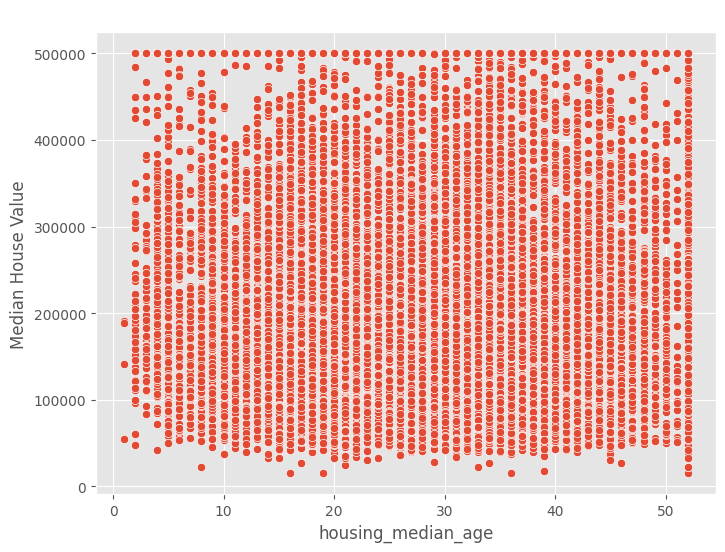

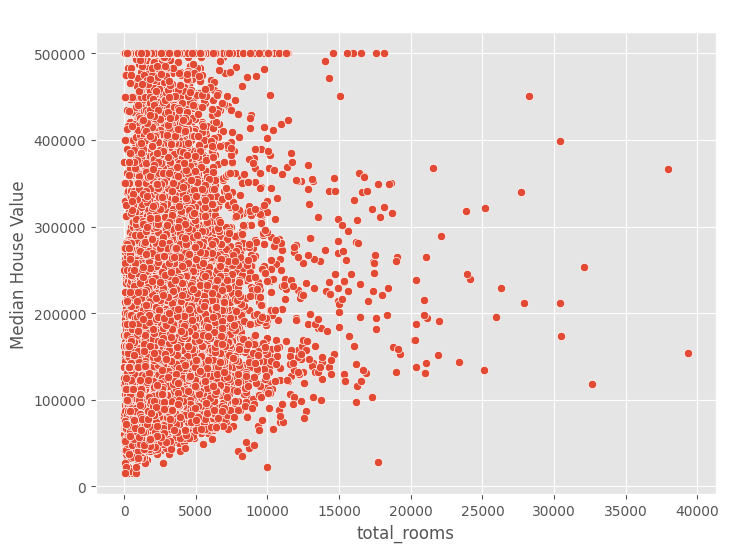

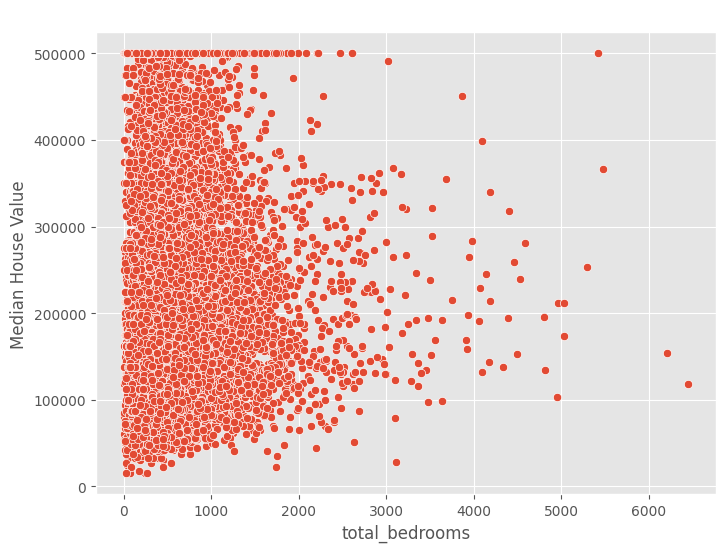

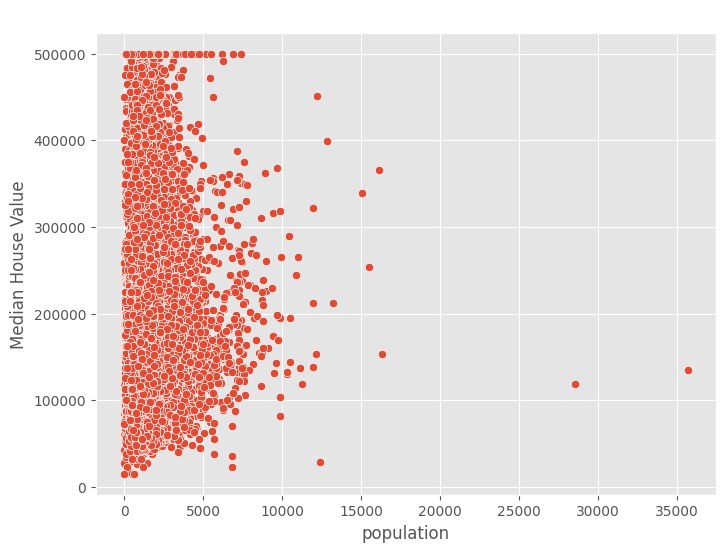

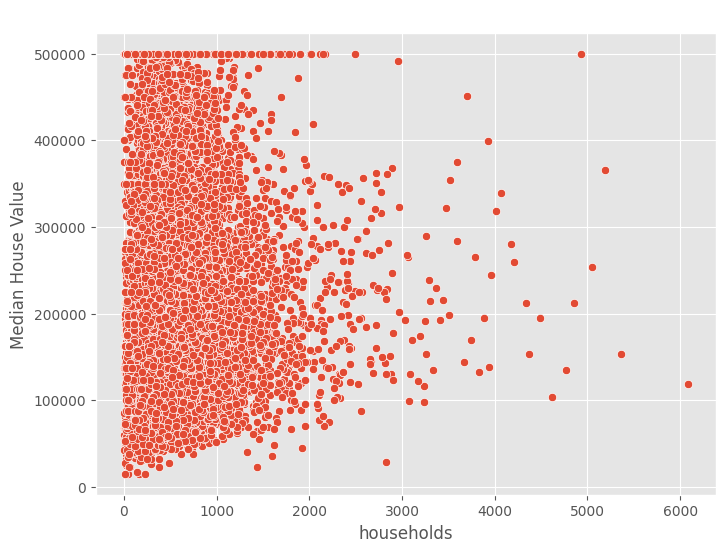

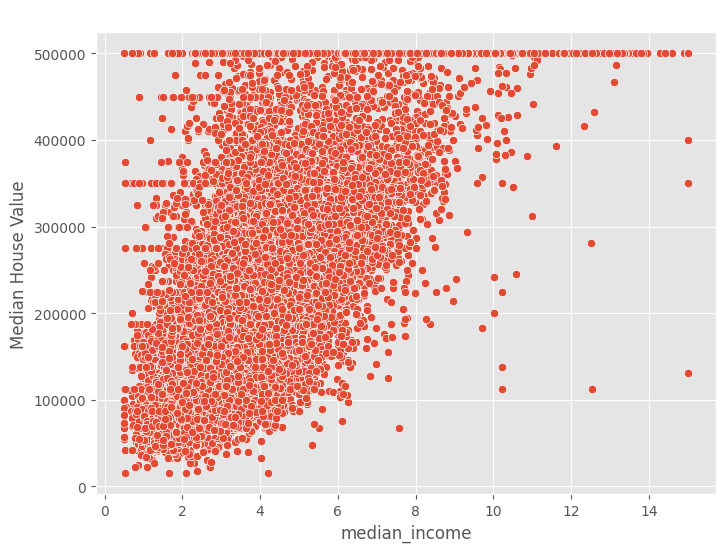

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('median_house_value')
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['median_house_value'])
    plt.title(f'{feature} vs. Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.show()

/tmp/ipykernel_3504/3769939512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


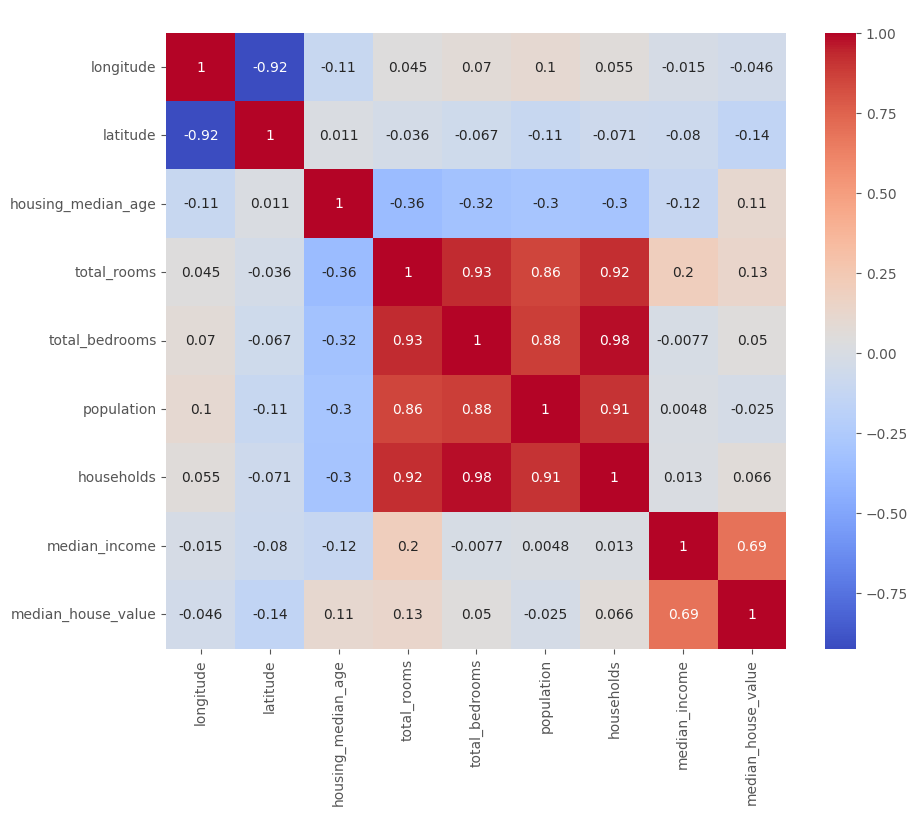

In [233]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Use a heatmap for visualizing the correlation matrix.
plt.title('Correlation Matrix')
plt.show()

In [234]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('median_house_value') 
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [235]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [236]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),  # Apply numerical transformer to numerical columns
        ('cat', categorical_transformer, categorical_cols)  # Apply categorical transformer to categorical columns
    ])


In [237]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [238]:
df['median_house_value_binned'] = np.where(df['median_house_value'] >= 500000, 500000, df['median_house_value'])
df['median_house_value_binned_log'] = np.log1p(df['median_house_value_binned'])

In [239]:
X = df.drop(['median_house_value', 'median_house_value_binned', 'median_house_value_binned_log'], axis=1)
y = df['median_house_value_binned_log'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [240]:
results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R²': r2, 'predictions': y_pred}


In [241]:
print("\nModel Evaluation:")
for name, metrics in results.items():
    print(f'{name}: MSE = {metrics["MSE"]:.4f}, R² = {metrics["R²"]:.4f}')


Model Evaluation:
Linear Regression: MSE = 0.1137, R² = 0.6498
Ridge Regression: MSE = 0.1137, R² = 0.6498
Lasso Regression: MSE = 0.1779, R² = 0.4518
Decision Tree: MSE = 0.1016, R² = 0.6871
Random Forest: MSE = 0.0533, R² = 0.8357
Gradient Boosting: MSE = 0.0716, R² = 0.7792


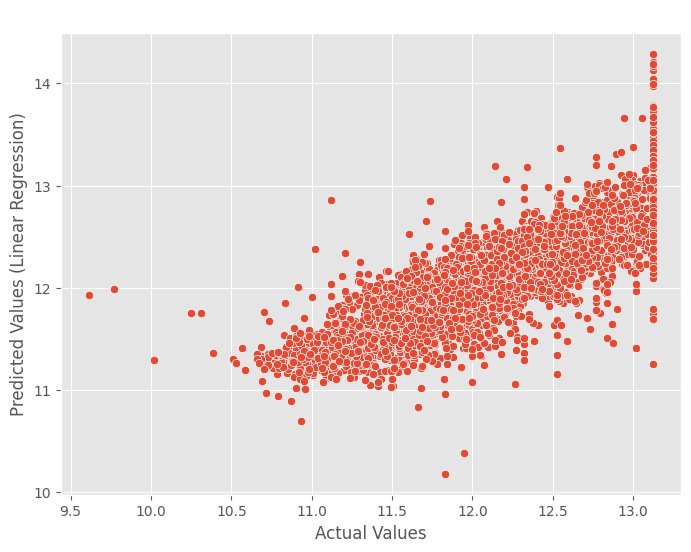

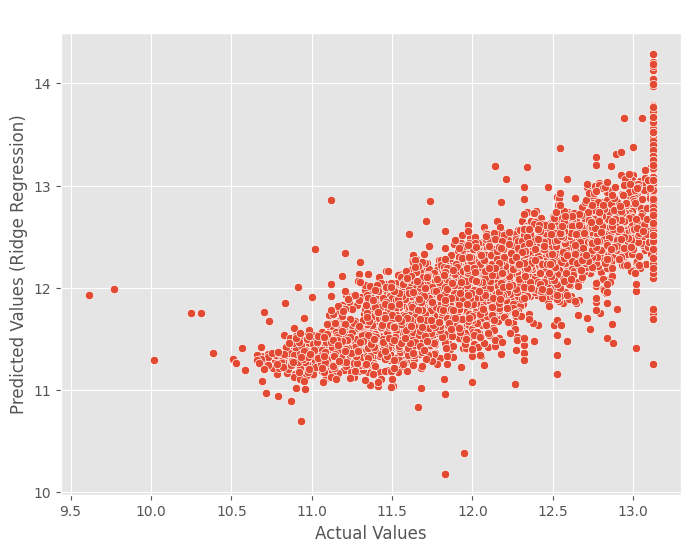

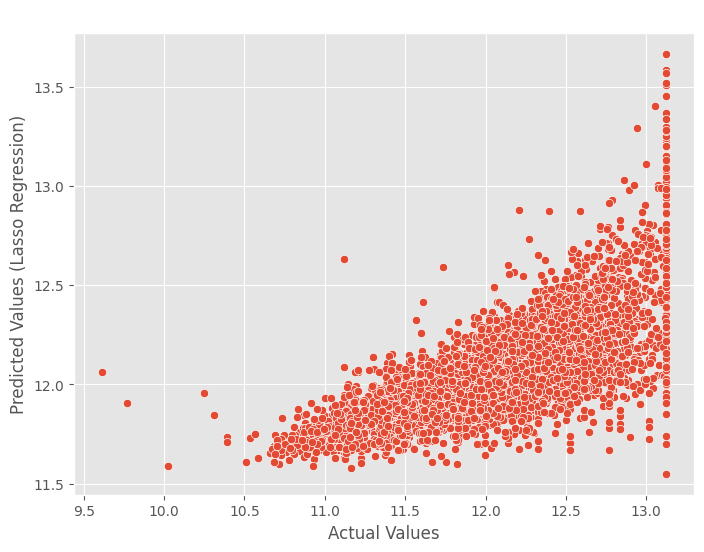

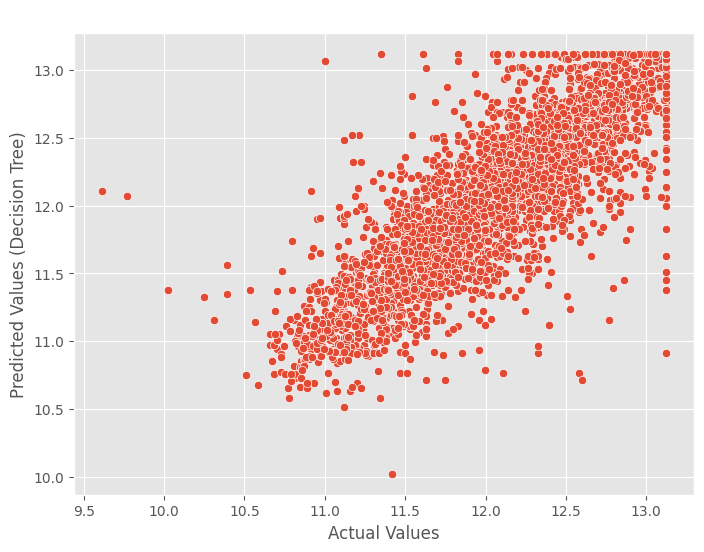

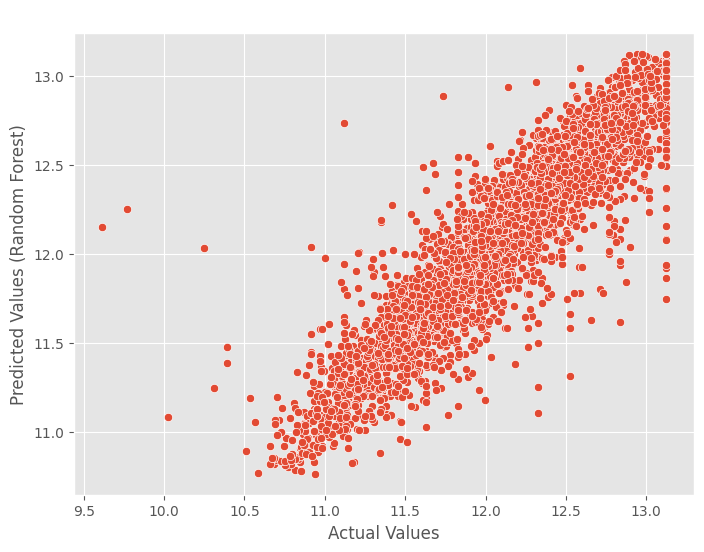

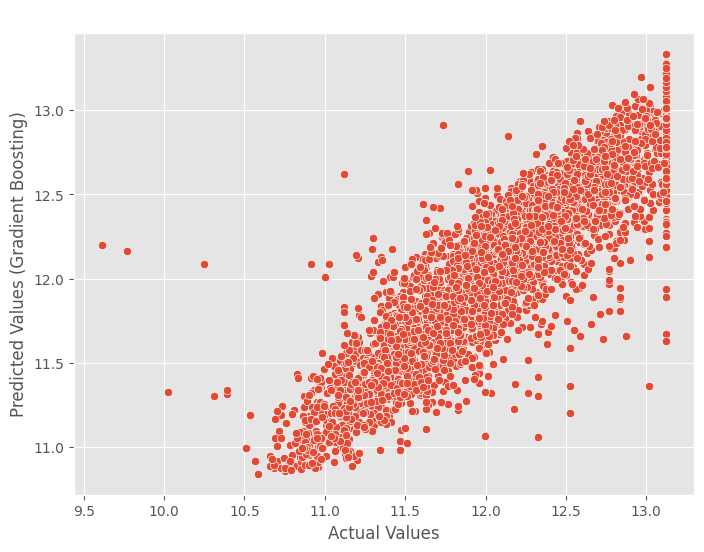

In [242]:
for name, metrics in results.items():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=metrics['predictions'])
    plt.xlabel('Actual Values')
    plt.ylabel(f'Predicted Values ({name})')
    plt.title(f'Actual vs Predicted ({name})')
    plt.show()

In [243]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],  
    'max_depth': [10, 20, 30, 40, 50],     
    'min_samples_split': [2, 5, 10, 15],   
    'min_samples_leaf': [1, 2, 4, 6],      
    'bootstrap': [True, False]           
}

In [244]:
random_search_rf = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                     param_distributions=param_grid_rf,
                                     n_iter=10,
                                     cv=5,
                                     scoring='neg_mean_squared_error',
                                     verbose=1,
                                     random_state=42,  # Important for reproducibility
                                     n_jobs=-1) 

In [245]:
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('random_search', random_search_rf)])
pipeline_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/home/shahroz/anaconda3/envs/deep-learning/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequ...
                                                  ['ocean_proximity'])])),
                ('random_search',
                 RandomizedSearchCV(cv=5,
                                    estimator=RandomForestRegressor(random_state=42),
                                    n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [10, 20,
                                                                       30, 40,
                                                                       50],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4,
                                                                              6],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10,
                                                                               15],
                                                         'n_estimators': [100,
                                                                          200,
                                                                          300,
                                                                          400,
                                                                          500]},
                                    random_state=42,
                                    scoring='neg_mean_squared_error',
                                    verbose=1))])

In [246]:
best_rf_model = pipeline_rf.named_steps['random_search'].best_estimator_
feature_names = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()
X_test_transformed = pd.DataFrame(pipeline_rf.named_steps['preprocessor'].transform(X_test), columns=feature_names)



y_pred_best_rf = best_rf_model.predict(X_test_transformed) # Pass the dataframe with feature names
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
mean_absolute_error_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

/home/shahroz/anaconda3/envs/deep-learning/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [247]:
print(f"\nRandomizedSearchCV for Random Forest: MSE = {(mse_best_rf)}, MAE = {mean_absolute_error_best_rf} R² = {r2_best_rf:.4f}")


RandomizedSearchCV for Random Forest: MSE = 0.053105785255571934, MAE = 0.1556345365075397 R² = 0.8364


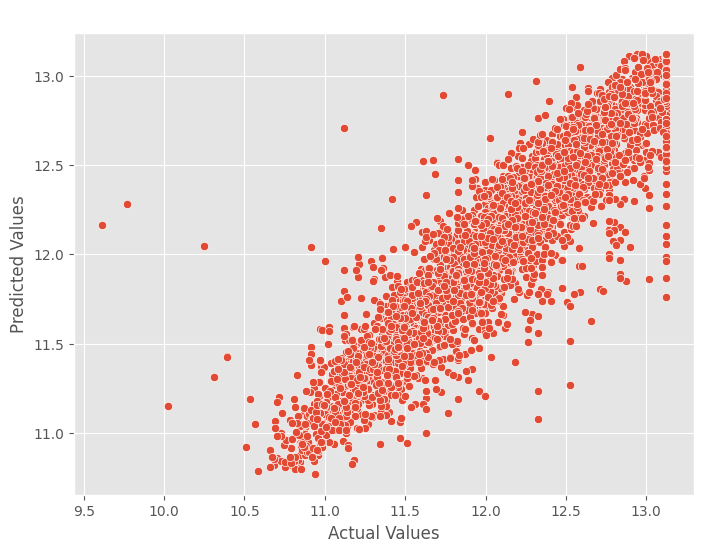

In [248]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (Best Random Forest)')
plt.show()